<a href="https://colab.research.google.com/github/Mennatullah61/DEPI-Final-Project/blob/Data-Preprocessing/RFM_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rfm_trans = pd.read_excel('/content/RFM Analysis.xlsx', sheet_name='Transactions')

rfm_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [ ]:
rfm_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

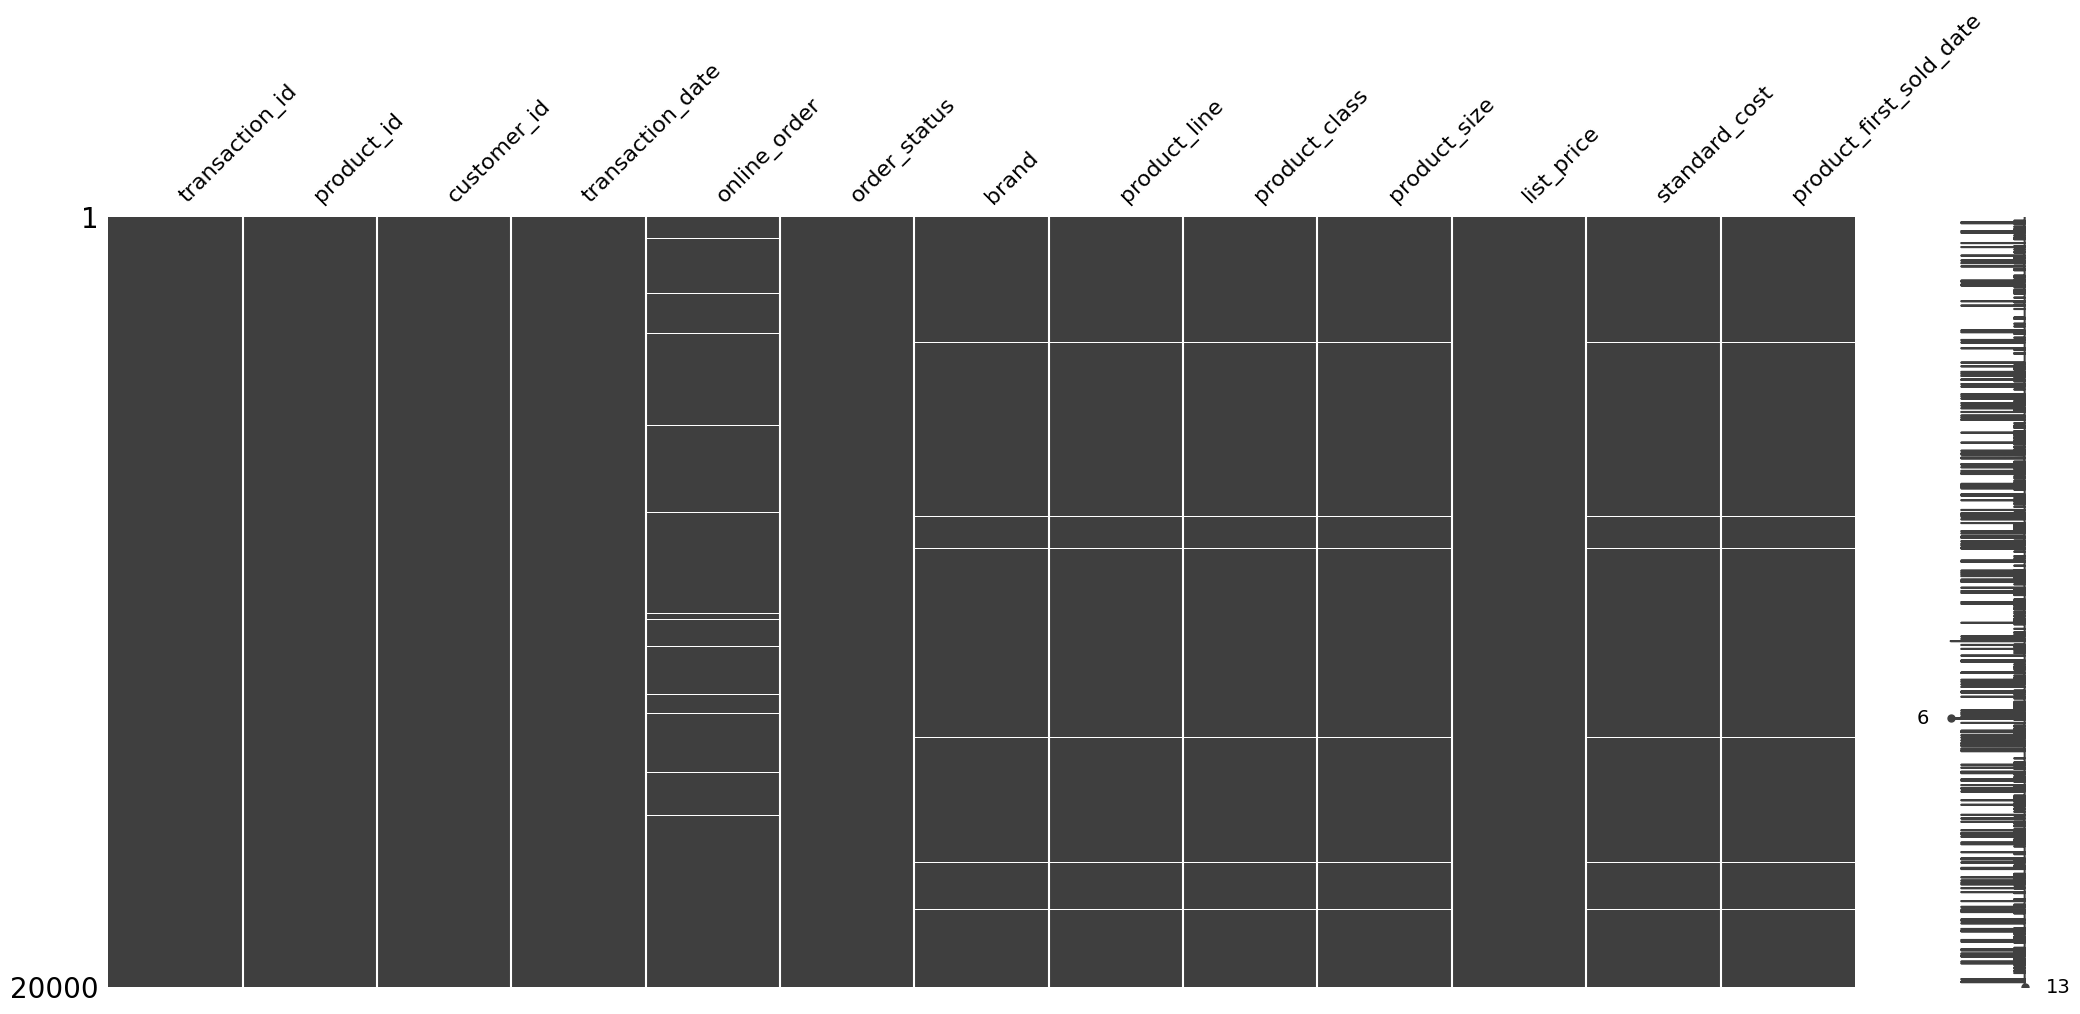

In [ ]:
import missingno as msno

msno.matrix(rfm_trans)
plt.show()

In [ ]:
# prompt: drop transaction_id column

rfm_trans = rfm_trans.drop('transaction_id', axis=1)


In [ ]:
rfm_trans['online_order'].value_counts()

,count
online_order,
1.0,9829
0.0,9811


In [ ]:
rfm_trans['online_order'].isnull().sum()

360

In [ ]:
rfm_trans.dropna(subset=['online_order'], inplace=True)   # 1.8%
rfm_trans['online_order'].isnull().sum()

0

In [ ]:
rfm_trans.isnull().sum() # 0.975

,0
product_id,0
customer_id,0
transaction_date,0
online_order,0
order_status,0
brand,195
product_line,195
product_class,195
product_size,195
list_price,0


In [ ]:
rfm_trans.dropna(inplace=True)
rfm_trans.duplicated().sum()

0

In [ ]:
rfm_trans['transaction_date'] = pd.to_datetime(rfm_trans['transaction_date'])

In [ ]:
rfm_trans['online_order'].value_counts()

,count
online_order,
1.0,9739
0.0,9706


In [ ]:
rfm_trans['order_status'].value_counts()

,count
order_status,
Approved,19273
Cancelled,172


In [ ]:
rfm_trans['brand'].value_counts()

,count
brand,
Solex,4169
WeareA2B,3245
Giant Bicycles,3244
OHM Cycles,2993
Trek Bicycles,2931
Norco Bicycles,2863


In [ ]:
rfm_trans['product_line'].value_counts()

,count
product_line,
Standard,13920
Road,3894
Touring,1213
Mountain,418


In [ ]:
rfm_trans['product_class'].value_counts()

,count
product_class,
medium,13587
high,2952
low,2906


In [ ]:
rfm_trans['product_size'].value_counts()

,count
product_size,
medium,12767
large,3900
small,2778


In [ ]:
rfm_trans['list_price'].value_counts()

,count
list_price,
2091.47,460
1403.50,389
71.49,269
1231.15,232
1890.39,230
...,...
1172.78,153
358.39,138
1227.34,126


In [ ]:
rfm_trans

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [ ]:
rfm_trans['product_first_sold_date'] = pd.to_datetime( rfm_trans['product_first_sold_date'], origin='1899-12-30', unit='D')
rfm_trans['product_first_sold_date'].value_counts()

,count
product_first_sold_date,
1992-10-02,230
2012-06-04,223
2003-07-21,221
2009-03-08,220
2004-08-17,217
...,...
2014-07-28,168
2016-02-04,167
2014-10-10,163


In [ ]:
# from google.colab import files

# rfm_trans.to_csv('RFM_Transaction.csv', index = False)
# files.download('RFM_Transaction.csv')

In [ ]:
rfm_trans['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [ ]:
rfm_trans['customer_id'].min()

1

In [ ]:
rfm_trans.shape

(19445, 12)